In [7]:
import pandas as pd
import numpy as np
import pydicom 
import matplotlib.pyplot as plt
import os
%matplotlib inline
datapath = "data"

In [51]:
train_labels = pd.read_csv(os.path.join(datapath, "stage_1_train_labels.csv"))
train_info =  pd.read_csv(os.path.join(datapath, "stage_1_detailed_class_info.csv"))

In [68]:
def get_image_path(id):
    id = str(id) + ".dcm"
    return os.path.join(datapath, "stage_1_train_images", id)

def plot_bounding_box(patient, cls):
    w, h = patient.width, patient.height
    x0, y0 = patient.x, patient.y
    x1, y1 = x0, y0 + h
    x2, y2 = x0 + w, y1
    x3, y3 = x2, y0
    plt.plot([x0, x1, x2, x3, x0],[y0, y1, y2, y3, y0], label=cls)

def plot_patient(pId, data, train_info):
    patients = data[data.patientId == pId]
    train_info = train_info[train_info.patientId == pId]
    for i in range(patients.shape[0]):
        patient = patients.iloc[i]
        cls = train_info.iloc[i]['class']
        plot_bounding_box(patient, cls)


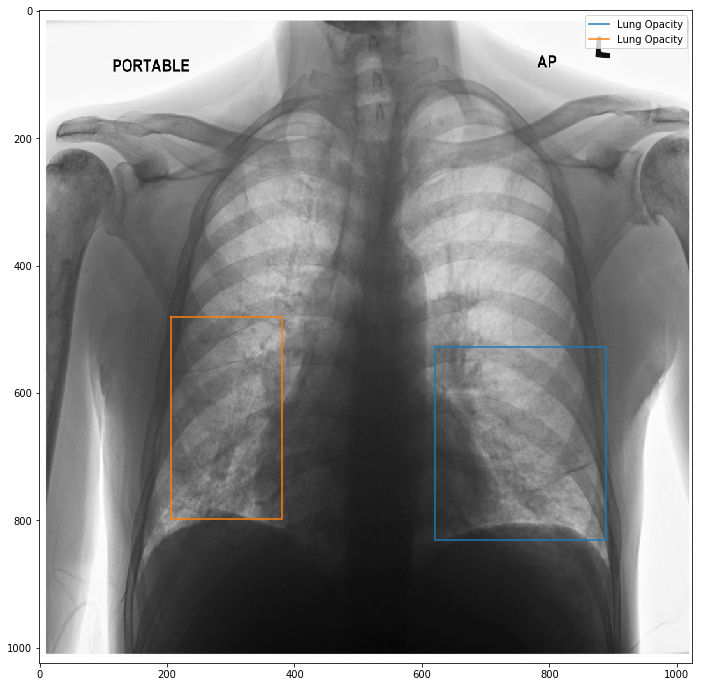

In [97]:
pId = train_labels.patientId.sample().iloc[0]
path = get_image_path(pId)
dcmimg = pydicom.read_file(path).pixel_array
plt.figure(figsize=(12,12))
plt.imshow(dcmimg, cmap="binary")
plot_patient(pId, train_labels, train_info)
plt.legend()

No Lung Opacity / Not Normal   11500
Normal                         8525
Lung Opacity                   8964


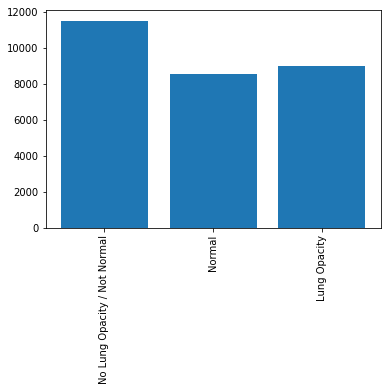

In [123]:
classes = train_info['class'].unique()
class_count = {cls: (train_info['class'] == cls).sum() for cls in classes}
x = range(len(class_count.keys()))
plt.bar(x, class_count.values())
plt.xticks(x, class_count.keys(), rotation=90)
for cls, val in class_count.items():
    print(f"{cls:30s} {val}")

In [183]:
def has_sickness(patientId, train_labels):
    first = train_labels[train_labels.patientId == patientId].iloc[0]
    has_bounding_box = not np.isnan(first.x)
    return has_bounding_box

In [184]:
number_of_areas = {pId: (train_labels.patientId == pId).sum() if has_sickness(pId, train_labels) else 0 
                   for pId in train_labels.patientId.unique()}

In [156]:
values = np.fromiter(number_of_areas.values(), int)
print("Number of unique patients:", len(number_of_areas.keys()))
print("Max number of regions:", values.max())
print("Min number of regions:", values.min())
total_patients = len(number_of_areas.keys())
for i in range(values.max()):
    num_patients = (values == i).sum()
    print(f"Number of patients with {i} number of areas: {num_patients:5.0f} ({num_patients/total_patients*100:2.0f}%)")


Number of unique patients: 25684
Max number of regions: 4
Min number of regions: 0
Number of patients with 0 number of areas: 20025 (78%)
Number of patients with 1 number of areas:  2481 (10%)
Number of patients with 2 number of areas:  3062 (12%)
Number of patients with 3 number of areas:   105 ( 0%)


In [159]:
train_labels.shape

(28989, 6)